In [5]:
## Disease Condition prediction based on drug reviews

In this project, we will classify the condition of patients using the reviews of the drugs given by patients using drug reviews dataset available in [UCI ML Repository](https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29).

## Importing libraries

In [6]:
import pandas as pd # data preprocessing
import itertools # confusion matrix
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
# To show all the rows of pandas dataframe
pd.set_option('display.max_rows', None)

In [7]:
!pip install BeautifulSoup4 

In [8]:
str1="I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations."


lst = [str1]
lst

['I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations.']

In [9]:
import nltk
import sklearn
import bs4
print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))
print('The bs4 version is {}.'.format(bs4.__version__))

The nltk version is 3.8.1.
The scikit-learn version is 1.2.2.
The bs4 version is 4.12.2.


In [10]:
df=pd.read_csv('data\drugsComTrain_raw.csv')

In [11]:
df.to_csv('data/drugsComTrain.csv',index=False)

In [12]:
df.head()

uniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...       9  20-May-12   
1  "My son is halfway through his fourth week of ...       8  27-Apr-10   
2  "I used to take another oral contraceptive, wh...       5  14-Dec-09   
3  "This is my first time using any form of birth...       8   3-Nov-15   
4  "Suboxone has completely turned my life around...       9  27-Nov-16   

   usefulCount  
0           27  
1          192  
2           17  
3           10  
4           37

In [13]:
df.condition.value_counts().shape

(884,)

In [ ]:
#top_conditions.sum()

NameError: name 'top_conditions' is not defined

In [15]:
null_counts = df.isnull().sum()
null_counts

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [16]:
# Assuming you have a DataFrame named df

# Remove rows with null values in the "condition" column
df = df.dropna(subset=['condition'])

# Now, df does not contain rows with null values in the "condition" column


In [17]:
df = df.dropna()

In [18]:
df.condition.value_counts()

condition
Birth Control                                                          28788
Depression                                                              9069
Pain                                                                    6145
Anxiety                                                                 5904
Acne                                                                    5588
Bipolar Disorde                                                         4224
Insomnia                                                                3673
Weight Loss                                                             3609
Obesity                                                                 3568
ADHD                                                                    3383
Diabetes, Type 2                                                        2554
Emergency Contraception                                                 2463
High Blood Pressure                                               

In [19]:
df.condition.value_counts().shape

(884,)

In [20]:
##df_train = df[(df['condition']=='Birth Control') | (df['condition']=='Depression') | (df['condition']=='High Blood Pressure')|(df['condition']=='Diabetes, Type 2')]

In [21]:
all_conditions = df['condition'].unique()
df_train = df[df['condition'].isin(all_conditions)]


In [22]:
df.shape

(160398, 7)

In [23]:
df_train.shape

(160398, 7)

In [24]:
X = df_train.drop(['uniqueID','drugName','rating','date','usefulCount'],axis=1)

In [25]:
#plots

In [26]:
X.head()

condition  \
0  Left Ventricular Dysfunction   
1                          ADHD   
2                 Birth Control   
3                 Birth Control   
4             Opiate Dependence   

                                              review  
0  "It has no side effect, I take it in combinati...  
1  "My son is halfway through his fourth week of ...  
2  "I used to take another oral contraceptive, wh...  
3  "This is my first time using any form of birth...  
4  "Suboxone has completely turned my life around...

## data preprocessing

In [27]:
X['review'][2]

'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."'

In [28]:
X['review'][11]

'"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."'

In [29]:
for i, col in enumerate(X.columns):
    X.iloc[:, i] = X.iloc[:, i].str.replace('"', '')

In [31]:
# To set the width of the column to maximum
#pd.set_option('max_colwidth', -1)

In [32]:
X.head()

condition  \
0  Left Ventricular Dysfunction   
1                          ADHD   
2                 Birth Control   
3                 Birth Control   
4             Opiate Dependence   

                                              review  
0  It has no side effect, I take it in combinatio...  
1  My son is halfway through his fourth week of I...  
2  I used to take another oral contraceptive, whi...  
3  This is my first time using any form of birth ...  
4  Suboxone has completely turned my life around....

### What are stopwords ?

Stopwords are the most common words in any natural language. For the purpose of building NLP models, these stopwords might not add much value to the meaning of the document.

The most common words used in a text are **“the”, “is”, “in”, “for”, “where”, “when”, “to”, “at”** etc.

In [33]:
from nltk.corpus import stopwords

stop = stopwords.words('english')


In [34]:
stop

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

## Lemmitization
Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma .

In [35]:
#from IPython.display import Image
#Image(filename='stem.JPG')

In [36]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

porter = PorterStemmer()

lemmatizer = WordNetLemmatizer()

In [37]:
print(porter.stem("sportingly"))
print(porter.stem("very"))
print(porter.stem("troubled"))

sportingli
veri
troubl


In [38]:
from nltk.stem import WordNetLemmatizer
import zipfile

In [39]:
print(lemmatizer.lemmatize("sportingly"))
print(lemmatizer.lemmatize("very"))
print(lemmatizer.lemmatize("troubled"))

sportingly
very
troubled


In [ ]:
'''import nltk
nltk.download('omw-1.4')'''

KeyboardInterrupt: 

In [40]:
from bs4 import BeautifulSoup
import re

In [41]:
def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stop]
    # 6. lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(lemmitize_words))

In [42]:
X['review_clean'] = X['review'].apply(review_to_words)

C:\Users\ajilani\AppData\Local\Temp\ipykernel_3016\2066199760.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()


In [96]:
X.head()

condition  \
0  Left Ventricular Dysfunction   
1                          ADHD   
2                 Birth Control   
3                 Birth Control   
4             Opiate Dependence   

                                              review  \
0  It has no side effect, I take it in combinatio...   
1  My son is halfway through his fourth week of I...   
2  I used to take another oral contraceptive, whi...   
3  This is my first time using any form of birth ...   
4  Suboxone has completely turned my life around....   

                                        review_clean  
0  side effect take combination bystolic mg fish oil  
1  son halfway fourth week intuniv became concern...  
2  used take another oral contraceptive pill cycl...  
3  first time using form birth control glad went ...  
4  suboxone completely turned life around feel he...

## Creating features and Target Variable

In [44]:
X_feat=X['review_clean']
y=X['condition']

In [45]:
n = 50  # Replace 50 with the desired number of top conditions
label_counts = df['condition'].value_counts()
selected_labels = label_counts.head(n).index  # Select the top n conditions
filtered_df = df[df['condition'].isin(selected_labels)]

filtered_df['review_clean'] = filtered_df['review'].apply(review_to_words)

X_filtered = filtered_df['review_clean']  # Assuming 'review_clean' is your feature column
y_filtered = filtered_df['condition']
X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_filtered, test_size=0.2, random_state=0
)

C:\Users\ajilani\AppData\Local\Temp\ipykernel_3016\2066199760.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
C:\Users\ajilani\AppData\Local\Temp\ipykernel_3016\1213978688.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['review_clean'] = filtered_df['review'].apply(review_to_words)


In [81]:
# Save the list of top 50 conditions to a text file
with open("top_50_conditions.txt", "w") as file:
    for condition in selected_labels:
        file.write(f"{condition}\n")

In [46]:
stratify=y_filtered,

In [47]:
y=filtered_df['condition']

In [48]:
print(filtered_df.columns)


Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'review_clean'],
      dtype='object')


In [49]:
y.values.reshape(1,-1)
y

1                                 ADHD
2                        Birth Control
3                        Birth Control
4                    Opiate Dependence
6              Emergency Contraception
7                      Bipolar Disorde
9                        Birth Control
10                 Migraine Prevention
11                          Depression
13                               Cough
14                       Birth Control
15                             Obesity
16             Urinary Tract Infection
17                         ibromyalgia
18                     Bipolar Disorde
20                       HIV Infection
21                            Insomnia
22                       Birth Control
23                Rheumatoid Arthritis
24             Vaginal Yeast Infection
27                                ADHD
28                       Panic Disorde
29                            Migraine
31                          Depression
32                                Pain
33             Vaginal Ye

In [50]:
#............................no need to execute.....................!!!!!
#X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2, random_state=0)

In [51]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Bag of Words

In [52]:
count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)

In [53]:
count_train

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 2983306 stored elements and shape (98546, 31937)>

In [54]:
from sklearn.metrics import classification_report


## Machine Learning Model : Passive Aggressive Classifier

In [55]:
all_labels = np.unique(y)

c:\codes\pyth\drug_ai\Drug_AI\menv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\codes\pyth\drug_ai\Drug_AI\menv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


##
##
accuracy:   0.776


c:\codes\pyth\drug_ai\Drug_AI\menv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\codes\pyth\drug_ai\Drug_AI\menv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\codes\pyth\drug_ai\Drug_AI\menv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\codes\pyth\drug_ai\Drug_AI\menv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_spar

Classification Report:
                              precision    recall  f1-score   support

                        ADHD       0.87      0.87      0.87       657
   Abnormal Uterine Bleeding       0.49      0.67      0.57       437
                        Acne       0.89      0.91      0.90      1091
           Allergic Rhinitis       0.44      0.85      0.58       165
                     Anxiety       0.56      0.67      0.61      1166
          Anxiety and Stress       0.41      0.34      0.38       328
                   Back Pain       0.54      0.33      0.41       110
         Bacterial Infection       0.56      0.67      0.61       180
             Bipolar Disorde       0.68      0.76      0.72       855
               Birth Control       0.94      0.92      0.93      5794
           Bowel Preparation       0.96      0.94      0.95       359
                Chronic Pain       0.54      0.42      0.47       297
                Constipation       0.82      0.83      0.83       

c:\codes\pyth\drug_ai\Drug_AI\menv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\codes\pyth\drug_ai\Drug_AI\menv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\codes\pyth\drug_ai\Drug_AI\menv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\codes\pyth\drug_ai\Drug_AI\menv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_spar

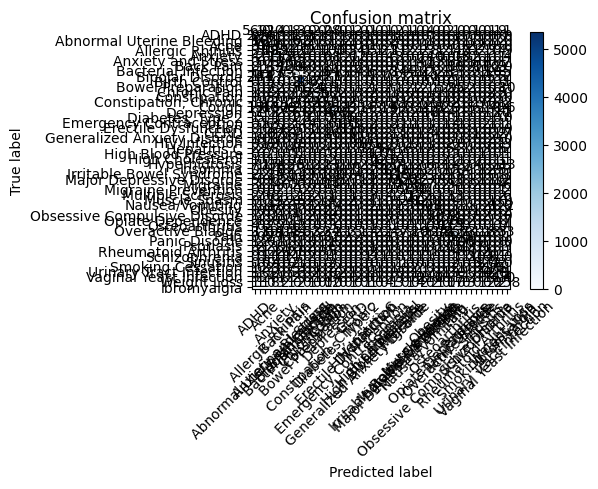

In [56]:
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
from sklearn.metrics import classification_report

passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
print("##")
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("##")
print("accuracy:   %0.3f" % score)


classification_rep = classification_report(y_test, pred, target_names=all_labels)

# Print the classification report
print("Classification Report:")
print(classification_rep)
cm = metrics.confusion_matrix(y_test, pred)
all_labels = np.unique(y)
plot_confusion_matrix(cm, classes=all_labels)


### TFIDF

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

In [58]:
###### Machine Learning Model : Naive Bayes

## Machine Learning Model TFIDF

In [59]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train, y_train)
pred = pass_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
#cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
#plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

classification_rep = classification_report(y_test, pred, target_names=all_labels)

# Print the classification report
print("Classification Report:")
print(classification_rep)

# cm = metrics.confusion_matrix(y_test, pred)
# all_labels = np.unique(y)
# plot_confusion_matrix(cm, classes=all_labels)

c:\codes\pyth\drug_ai\Drug_AI\menv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\codes\pyth\drug_ai\Drug_AI\menv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\codes\pyth\drug_ai\Drug_AI\menv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\codes\pyth\drug_ai\Drug_AI\menv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_spar

accuracy:   0.813
Classification Report:
                              precision    recall  f1-score   support

                        ADHD       0.91      0.89      0.90       657
   Abnormal Uterine Bleeding       0.74      0.59      0.66       437
                        Acne       0.92      0.91      0.91      1091
           Allergic Rhinitis       0.82      0.83      0.82       165
                     Anxiety       0.65      0.66      0.66      1166
          Anxiety and Stress       0.53      0.50      0.51       328
                   Back Pain       0.38      0.42      0.40       110
         Bacterial Infection       0.71      0.68      0.69       180
             Bipolar Disorde       0.77      0.78      0.78       855
               Birth Control       0.92      0.97      0.95      5794
           Bowel Preparation       0.94      0.95      0.95       359
                Chronic Pain       0.57      0.47      0.52       297
                Constipation       0.81      0.8

## TFIDF: Bigrams

In [60]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)

In [61]:
from sklearn.metrics import classification_report

In [62]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)
pred = pass_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
#cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
#plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

classification_rep = classification_report(y_test, pred, target_names=all_labels)

# Print the classification report
print("Classification Report:")
print(classification_rep)

# cm = metrics.confusion_matrix(y_test, pred)
# all_labels = np.unique(y)
#plot_confusion_matrix(cm, classes=all_labels)

c:\codes\pyth\drug_ai\Drug_AI\menv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\codes\pyth\drug_ai\Drug_AI\menv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\codes\pyth\drug_ai\Drug_AI\menv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\codes\pyth\drug_ai\Drug_AI\menv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_spar

accuracy:   0.863
Classification Report:
                              precision    recall  f1-score   support

                        ADHD       0.92      0.92      0.92       657
   Abnormal Uterine Bleeding       0.90      0.75      0.82       437
                        Acne       0.95      0.95      0.95      1091
           Allergic Rhinitis       0.88      0.88      0.88       165
                     Anxiety       0.70      0.75      0.73      1166
          Anxiety and Stress       0.71      0.59      0.65       328
                   Back Pain       0.66      0.45      0.54       110
         Bacterial Infection       0.78      0.74      0.76       180
             Bipolar Disorde       0.85      0.83      0.84       855
               Birth Control       0.95      0.98      0.97      5794
           Bowel Preparation       0.96      0.97      0.97       359
                Chronic Pain       0.75      0.53      0.62       297
                Constipation       0.85      0.8

## TFIDF : Trigrams

In [63]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer3.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_3, y_train)
pred = pass_tf.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
#cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
#plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

classification_rep = classification_report(y_test, pred, target_names=all_labels)

# Print the classification report
print("Classification Report:")
print(classification_rep)

# cm = metrics.confusion_matrix(y_test, pred)
# all_labels = np.unique(y)
# plot_confusion_matrix(cm, classes=all_labels)

c:\codes\pyth\drug_ai\Drug_AI\menv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\codes\pyth\drug_ai\Drug_AI\menv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\codes\pyth\drug_ai\Drug_AI\menv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\codes\pyth\drug_ai\Drug_AI\menv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_spar

accuracy:   0.867
Classification Report:
                              precision    recall  f1-score   support

                        ADHD       0.92      0.93      0.92       657
   Abnormal Uterine Bleeding       0.92      0.72      0.81       437
                        Acne       0.94      0.95      0.94      1091
           Allergic Rhinitis       0.91      0.88      0.89       165
                     Anxiety       0.72      0.77      0.74      1166
          Anxiety and Stress       0.76      0.58      0.66       328
                   Back Pain       0.84      0.42      0.56       110
         Bacterial Infection       0.77      0.76      0.76       180
             Bipolar Disorde       0.85      0.84      0.84       855
               Birth Control       0.95      0.99      0.97      5794
           Bowel Preparation       0.95      0.97      0.96       359
                Chronic Pain       0.82      0.49      0.62       297
                Constipation       0.83      0.8

In [64]:
from sklearn.metrics import classification_report

# Assuming you have the true labels y_test and predicted labels pred
classification_rep = classification_report(y_test, pred, target_names=all_labels)

# Print the classification report
print("Classification Report:")
print(classification_rep)


c:\codes\pyth\drug_ai\Drug_AI\menv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\codes\pyth\drug_ai\Drug_AI\menv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\codes\pyth\drug_ai\Drug_AI\menv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\codes\pyth\drug_ai\Drug_AI\menv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_spar

Classification Report:
                              precision    recall  f1-score   support

                        ADHD       0.92      0.93      0.92       657
   Abnormal Uterine Bleeding       0.92      0.72      0.81       437
                        Acne       0.94      0.95      0.94      1091
           Allergic Rhinitis       0.91      0.88      0.89       165
                     Anxiety       0.72      0.77      0.74      1166
          Anxiety and Stress       0.76      0.58      0.66       328
                   Back Pain       0.84      0.42      0.56       110
         Bacterial Infection       0.77      0.76      0.76       180
             Bipolar Disorde       0.85      0.84      0.84       855
               Birth Control       0.95      0.99      0.97      5794
           Bowel Preparation       0.95      0.97      0.96       359
                Chronic Pain       0.82      0.49      0.62       297
                Constipation       0.83      0.87      0.85       

In [65]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have the true labels y_test and predicted labels pred
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')
f1 = f1_score(y_test, pred, average='weighted')

# Print the metrics
print(f"Weighted Precision: {precision}")
print(f"Weighted Recall: {recall}")
print(f"Weighted F1 Score: {f1}")


c:\codes\pyth\drug_ai\Drug_AI\menv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\codes\pyth\drug_ai\Drug_AI\menv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\codes\pyth\drug_ai\Drug_AI\menv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\codes\pyth\drug_ai\Drug_AI\menv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_spar

Weighted Precision: 0.8682367703764733
Weighted Recall: 0.8665827819945611
Weighted F1 Score: 0.8642307298777941


c:\codes\pyth\drug_ai\Drug_AI\menv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\codes\pyth\drug_ai\Drug_AI\menv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\codes\pyth\drug_ai\Drug_AI\menv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\codes\pyth\drug_ai\Drug_AI\menv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_spar

## Most important Features

In [67]:
def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):
    labelid = list(classifier.classes_).index(classlabel)
    feature_names = vectorizer.get_feature_names_out()
    topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]

    for coef, feat in topn:
        print (classlabel, feat, coef)



most_informative_feature_for_class(tfidf_vectorizer3, pass_tf, 'Birth Control')

Birth Control removed 5.44300668820387
Birth Control pregnant 5.5126877053243755
Birth Control moody 5.583041914855915
Birth Control period 5.662438645340672
Birth Control insertion 6.119999366150037
Birth Control skyla 6.192243296398118
Birth Control nuvaring 6.998879512998127
Birth Control implant 7.546858324343652
Birth Control implanon 8.201935295971067
Birth Control nexplanon 10.211691383047691


In [68]:
most_informative_feature_for_class(tfidf_vectorizer3, pass_tf, 'Depression')

Depression bupropion 3.1758191006805907
Depression nardil 3.862534738507442
Depression brintellix 4.17057133747881
Depression parnate 4.1891617295523815
Depression deplin 4.614743467760839
Depression wellbutrin 4.844563557400706
Depression antidepressant 4.853348360743283
Depression viibryd 5.533745981348509
Depression pristiq 6.477945890345403
Depression depression 9.763257096661231


In [69]:
most_informative_feature_for_class(tfidf_vectorizer3, pass_tf, 'Anxiety')

Anxiety lexapro 3.1328920373133924
Anxiety lorazepam 3.30384115671562
Anxiety diazepam 3.530801226152978
Anxiety buspirone 3.7399243905438406
Anxiety ativan 3.75169544305828
Anxiety xanax 3.9689602200286678
Anxiety vistaril 4.954926039397752
Anxiety valium 5.33974305559199
Anxiety buspar 7.358825435456807
Anxiety anxiety 9.049563813089549


In [70]:
most_informative_feature_for_class(tfidf_vectorizer3, pass_tf, 'Pain')

Pain oxycontin 3.672655858241305
Pain dilaudid 3.728728566840897
Pain hysingla 3.8093899186641567
Pain darvocet 3.855817627346075
Pain vicodin 3.8629576889684585
Pain percocet 4.177648160894721
Pain opana 5.572840135354165
Pain pain 6.027310525551328
Pain toradol 6.204980168014917
Pain nucynta 7.686489873208824


## Sample Predictions

In [71]:
X.tail()

condition  \
161292     Alcohol Dependence   
161293        Nausea/Vomiting   
161294   Rheumatoid Arthritis   
161295    Underactive Thyroid   
161296  Constipation, Chronic   

                                                   review  \
161292  I wrote my first report in Mid-October of 2014...   
161293  I was given this in IV before surgey. I immedi...   
161294  Limited improvement after 4 months, developed ...   
161295  I&#039;ve been on thyroid medication 49 years,...   
161296  I&#039;ve had chronic constipation all my adul...   

                                             review_clean  
161292  wrote first report mid october alcohol since p...  
161293  given iv surgey immediately became anxious cou...  
161294  limited improvement month developed bad rash m...  
161295  thyroid medication year spent first synthroid ...  
161296  chronic constipation adult life tried linz wor...

In [72]:
## Function for Extracting Top drugs

def top_drugs_extractor(condition):
    df_top = df[(df['rating']>=9)&(df['usefulCount']>=100)].sort_values(by = ['rating', 'usefulCount'], ascending = [False, False])
    drug_lst = df_top[df_top['condition']==condition]['drugName'].head(3).tolist()
    return drug_lst

In [73]:
def predict_text(lst_text):
    df_test = pd.DataFrame(lst_text, columns = ['test_sent'])
    df_test["test_sent"] = df_test["test_sent"].apply(review_to_words)
    tfidf_bigram = tfidf_vectorizer3.transform(lst_text)
    prediction = pass_tf.predict(tfidf_bigram)
    df_test['prediction']=prediction
    return df_test

In [74]:
sentences = [
  "I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations.",
    "This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap.",
    "I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losing so much weight. No side effects yet. Miracle medicine for me",
    
  ]

In [76]:
tfidf_trigram = tfidf_vectorizer3.transform(sentences)


predictions = pass_tf.predict(tfidf_trigram)
predictions

array(['High Blood Pressure', 'Depression', 'Diabetes, Type 2'],
      dtype='<U28')

In [77]:
tfidf_trigram = tfidf_vectorizer3.transform(sentences)


predictions = pass_tf.predict(tfidf_trigram)

for text, label in zip(sentences, predictions):
    if label=="Anxiety":
        target="Anxiety"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Depression":
        target="Depression"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Pain":
        target="Pain"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    else:
        target="Birth Control"
        print("text:", text, "\Condition:", target)
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

text: I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations. \Condition: Birth Control
text: I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations. 
Condition: Birth Control
Top 3 Suggested Drugs:
Losartan
Aldactone
Spironolactone

text: This is th

In [78]:
df_testsent = predict_text(sentences)
df_testsent

test_sent           prediction
0  tekturna day effect immediate also calcium cha...  High Blood Pressure
1  third med tried anxiety mild depression week h...           Depression
2  got diagnosed type doctor prescribed invokana ...     Diabetes, Type 2

In [85]:
import joblib
joblib.dump(tfidf_vectorizer3, 'model/tfidfvectorizer.pkl')
joblib.dump(pass_tf, 'model/passmodel.pkl')

['model/passmodel.pkl']

In [80]:
vectorizer = joblib.load('tfidfvectorizer.pkl')
model = joblib.load('passmodel.pkl')

test = model.predict(vectorizer.transform(["I&#039;ve been taking Lexapro (escitaploprgram) since February. First, I&#039;d like to mention that you can NOT take this drug for a week or less and expect to magically feel better; I felt really sick the first two weeks on this drug. But you HAVE to give the drug time. For me, I didn&#039;t really start noticing the drugs positive effects for about two months. I took Zoloft before this and felt like it made me too tired and absent-minded. Luckily, Lexapro doesn&#039;t seem to have this effect (although I do drink caffeinated drinks). I like Lexapro not only because my anxiety and depression is completely gone, but I feel like I can finally handle everything in my life now (I&#039;m a working full-time college student). I highly recommend this drug."]))
test[0]

'Depression'

In [ ]:
vectorizer = joblib.load('model/tfidfvectorizer.pkl')
model = joblib.load('model/passmodel.pkl')



['Vicodin']

In [94]:
test = model.predict(vectorizer.transform(["Psoriasis"]))
top_drugs_extractor(test[0])

['Methotrexate', 'Methotrexate', 'Humira']